# KNN- K nearest Neighbors

In [1]:
# input: [sweetness,crunchiness]
X = [[10,9],[1,4],[10,1],[7,10],[3,10],[1,1],[5,10]]

In [2]:
y = ['fruit','protein','fruit','vegetable','vegetable','protein','vegetable']

In [3]:
import numpy as np
np.unique(y)

array(['fruit', 'protein', 'vegetable'], dtype='<U9')

In [4]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import KNeighborsRegressor
# default we have n_neghbours = 5
model = KNeighborsClassifier(n_neighbors=3)

In [5]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [6]:
tomato = [[6,10]]

In [7]:
model.predict(tomato)

array(['vegetable'], dtype='<U9')

In [8]:
pineapple = [[10,2]]
model.predict(pineapple)

array(['fruit'], dtype='<U9')

In [9]:
model.score(X,y)*100

85.71428571428571

In [10]:
model.n_neighbors

3

In [11]:
model.classes_

array(['fruit', 'protein', 'vegetable'], dtype='<U9')

In [12]:
model.predict([[10,2]])

array(['fruit'], dtype='<U9')

In [13]:
model.predict_proba([[10,2]])

array([[0.66666667, 0.        , 0.33333333]])

In [ ]:
# we have total 3 NN
# 1NN- Fruit
# 2NN- Fruit
# 3NN - Veg.

In [14]:
2/3
# Neigbours: 1NN:Fruit 2NN:Protein 3NN:Vegetable

0.6666666666666666

In [15]:
1/3 # Veg

0.3333333333333333

In [ ]:
model.predict_proba([[6,10]])#tomato

In [ ]:
3/3 # all 3 are of Vegetabl. category

In [ ]:
model.predict_proba([[6,4]])

In [ ]:
model.predict([[6,4]])

### lets change k Value

In [16]:
model_2 = KNeighborsClassifier(n_neighbors=7)
model_2.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

In [17]:
model_2.classes_

array(['fruit', 'protein', 'vegetable'], dtype='<U9')

In [18]:
model_2.predict([[12,7]])

array(['vegetable'], dtype='<U9')

In [19]:
model_2.predict_proba([[12,7]])

array([[0.28571429, 0.28571429, 0.42857143]])

In [20]:
# 7 NN==> 2 (fruits), 2(protein), 3(Veg.)
3/7

0.42857142857142855

In [21]:
model_2.score(X,y)*100

42.857142857142854

# Find out K value???

In [22]:
from sklearn.metrics import f1_score

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
print(knn.score(X,y)*100)

85.71428571428571


In [24]:
len(X)

7

In [26]:
score = []
for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    score.append(knn.score(X,y)*100)

In [27]:
score

[100.0,
 100.0,
 85.71428571428571,
 85.71428571428571,
 71.42857142857143,
 57.14285714285714]

Text(0, 0.5, 'f1_score')

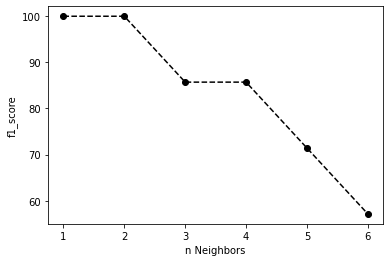

In [30]:
import matplotlib.pyplot as plt 

plt.plot(range(1,7),score,'--ko')
plt.xlabel('n Neighbors')
plt.ylabel('f1_score')

In [31]:
model.classes_

array(['fruit', 'protein', 'vegetable'], dtype='<U9')

# Assignment: select k=4 and build a new model and test it. 

In [ ]:
for i in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    print('k=',i,'f1=',f1_score(y,y_pred,average='weighted'))

In [ ]:
f1 = []
k = []
for i in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    f1.append(f1_score(y,y_pred,average='weighted'))
    k.append(i)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k,f1,color='red',marker='*',linestyle='--')

# Hyperparamter tuning

In [ ]:
KNeighborsClassifier?

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

params = {
            'n_neighbors': [3,5,7],
            'weights': ['uniform', 'distance'],
            'p': [1,2],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
        }

clf = GridSearchCV(
    estimator=knn,
    param_grid=params,
    cv=2,
    n_jobs=-1,
    verbose=1
)

In [ ]:
clf

In [ ]:
clf.fit(X,y)

In [ ]:
#now we can ask to clf about best parameters
clf.best_params_

In [ ]:
params

In [ ]:
#now check final model
clf.best_estimator_

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [ ]:
knn_2.fit(X,y)

In [ ]:
knn_2.score(X,y)